# Scikit-learn
- a free software machine learning library
- various classification, regression and clustering algorithms
- built on NumPy, SciPy, and matplotlib

In Scikit-learn classifiers are Python objects. They are trained and evaluated using methods implemented by all classifier objects.

We start by importing a number of libraries and modules that we will be using in this class

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Tools for scaling data, PCA, and standard datasets
from sklearn import preprocessing, decomposition, datasets

# Tools for tracking learning curves and perform cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve

# The k-NN learning algorithm
from sklearn.neighbors import KNeighborsClassifier as kNN

We now load in memory the *Breast Cancer Wisconsin (Diagnostic) Data Set*, a dataset for binary classification. The labels are `M` (malignant cancer) and `B` (benign cancer).

In [41]:
#!git clone https://github.com/Abudo-S/GenericML.git
cancer = pd.read_csv("/content/GenericML/MSA-main/Datasets/cancer.csv")
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

By inspecting the dataset we note that the first column (`id`) and the last column can be dropped.

In [42]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Since the last column contains all `Nan`, and there are not other `Nan` values in the dataset, we can delete it using the `dropna()` method invoked over the columns. **This deletes any column that contains at least a `Nan` value.**

In [43]:
cancer = cancer.dropna(axis='columns')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next, we create the set of instances by dropping the column `id` and by dropping the column `diagnosis` containing the labels. We do this using the method `drop()`.

In [44]:
X = cancer.drop(columns=['id', 'diagnosis']).values
X
#cancer['diagnosis']

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [37]:
X.shape

(569, 30)

Finally, we replace the categorical labels `B` and `M` with numerical labels `0` and `1`.

In [45]:
str_to_int = {'B' : 0, 'M' : 1}
cancer['diagnosis'] = cancer['diagnosis'].map(str_to_int)
np.unique(cancer['diagnosis'])

array([0, 1])

This allows us to use the new values in the column `diagnoses` as vector of labels.

In [46]:
y = cancer['diagnosis'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Using the Numpy function `unique()` with the flag `return_counts` set, we can see the number of examples in each class.

In [47]:
np.unique(y, return_counts=True)

(array([0, 1]), array([357, 212]))

Our next step is to randomly split the dataset in training and test sets. Since the dataset is relatively small (569 points), we leave 40% of the data for testing. The `random_state` variable is used a seed (we choose 42 just as any other value) for the random number generator in case we want to repeat the experiment using the same random bits. The flag `stratify` creates a split with the same proportion of classes in the train and test sets (especially useful when datasets are unbalanced).

In [49]:
#stratification is a balancing technique to make sure that the proportions of different classes in your original dataset are maintained in both your training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)
print(f'labels of training set {np.unique(y_train, return_counts=True)}')
print(f'labels of test set {np.unique(y_test, return_counts=True)}')

labels of training set (array([0, 1]), array([214, 127]))
labels of test set (array([0, 1]), array([143,  85]))


We are now ready to train a classifier for this dataset. We create a $1$-NN classifier object by invoking the function `kNN(n_neighbors=1)`, where `kNN()` is the alias we created when we imported the module for `KNeighborsClassifier()`. The object is assigned to the variable `knn`.

In [50]:
knn = kNN(n_neighbors=1)
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

Then we train the 1-NN classifier by invoking the method `fit()` with training points and training labels as arguments

In [51]:
#note that in KNN the training phase is just memorizing the X_train, y_train
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Finally, we invoke the method `score()` to evaluate the accuracy of the trained model on both the training and the test set.

In [52]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.9166666666666666)

As expected, the training accuracy is 1 (i.e., zero training error) while the testing accuracy is way below.

We perform a second experiment on the same random split this time using 3-NN.

In [53]:
knn = kNN(n_neighbors=3) # 3-NN
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9560117302052786, 0.9385964912280702)

Predictably, the training accuracy went down (by about 5%), while the test accuracy is now pretty close to the training accuracy.

Next, we use the function `learning_curve()` to inspect the evolution of training and test performance of $7$-NN for increasing sizes of the training set.

For each value of the training set size, a 5-fold stratified cross-validation is performed to estimate the risk.

In [54]:
sizes = range(100, 401, 50)
train_size, train_score, val_score = learning_curve(kNN(n_neighbors=7), X, y, train_sizes=sizes, cv=5)

`val_score` is a matrix whose each row contains the accuracy on the $5$ folds of cross validation for a given value of training size

In [55]:
val_score

array([[0.85087719, 0.92105263, 0.9122807 , 0.85964912, 0.84955752],
       [0.86842105, 0.9122807 , 0.92982456, 0.92982456, 0.90265487],
       [0.90350877, 0.92105263, 0.93859649, 0.92982456, 0.92035398],
       [0.89473684, 0.92982456, 0.93859649, 0.92982456, 0.92920354],
       [0.86842105, 0.93859649, 0.93859649, 0.93859649, 0.92920354],
       [0.86842105, 0.93859649, 0.94736842, 0.93859649, 0.92920354],
       [0.87719298, 0.93859649, 0.94736842, 0.94736842, 0.92920354]])

The training and cross-validation scores are plotted as follows.

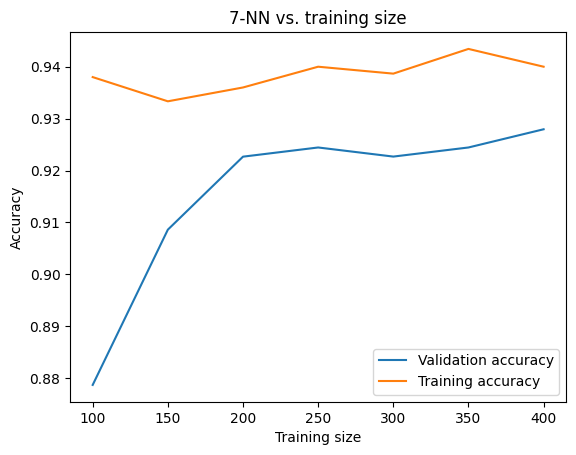

In [56]:
plt.title('7-NN vs. training size')
plt.plot(train_size, np.mean(val_score, 1), label='Validation accuracy')
plt.plot(train_size, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

Now we want to plot the training and test performance in terms of the parameter $k$ of $k$-NN. We start by creating a list of values of $k$ from 1 to 200 with steps of 20.

Then, we use the function `validation_curve()` to create a matrix of training scores and a matrix of test scores, where, as before, rows are indexed by the values of $k$ used to generate the scores, and columns report the per-fold performance in a cross-validation experiment.

In [57]:
neighbors = range(1,200,20)
train_score, val_score = validation_curve(kNN(), X, y, param_name='n_neighbors', param_range=neighbors, cv=5)
train_score, val_score

(array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.94505495, 0.92307692, 0.92967033, 0.92747253, 0.92763158],
        [0.92967033, 0.90989011, 0.91868132, 0.91868132, 0.92105263],
        [0.92307692, 0.91428571, 0.91428571, 0.90989011, 0.91447368],
        [0.92967033, 0.90769231, 0.90769231, 0.91208791, 0.90350877],
        [0.92527473, 0.90769231, 0.90549451, 0.9010989 , 0.90570175],
        [0.90769231, 0.9010989 , 0.89450549, 0.8967033 , 0.89912281],
        [0.9032967 , 0.8989011 , 0.88791209, 0.89010989, 0.89692982],
        [0.8967033 , 0.89450549, 0.88791209, 0.88351648, 0.89473684],
        [0.88351648, 0.88351648, 0.87472527, 0.87472527, 0.88596491]]),
 array([[0.85964912, 0.92982456, 0.9122807 , 0.9122807 , 0.91150442],
        [0.86842105, 0.92105263, 0.93859649, 0.95614035, 0.96460177],
        [0.85964912, 0.89473684, 0.92982456, 0.95614035, 0.95575221],
        [0.85087719, 0.88596491, 0.92982456, 0.93859649, 0.9380531 ],
        [0.8508771

Plotting the results clearly reveals overfitting and underfitting regions of the parameter $k$, with the best value at about $k=25$.

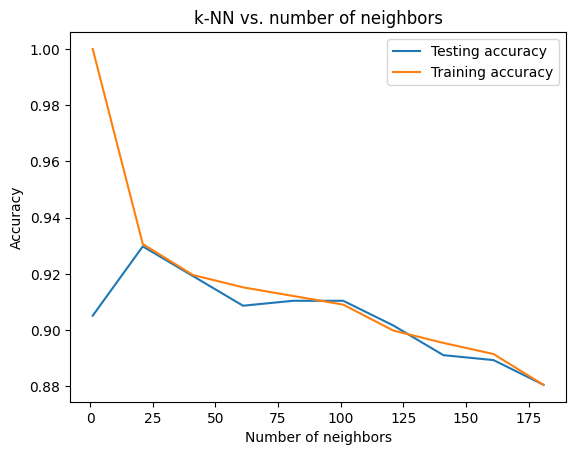

In [58]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, np.mean(val_score, 1), label='Testing accuracy')
plt.plot(neighbors, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We move on to a different dataset: the *Pima Indians Diabetes Database*. The goal of this dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Hence, the are only two labels (binary classification).

In [60]:
pima = pd.read_csv("/content/GenericML/MSA-main/Datasets/diabetes.csv")
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The `Outcome` column contains the labels. We use this to construct our sets of training points and training labels.

In [62]:
X = pima.drop(columns='Outcome').values
y = pima['Outcome'].values

As before, we count the proportions of positive and negative labels.

In [63]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 268]))

Then we split the dataset in training set (60%) and test set (40%) using stratification.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

The validation curve is plotted using the same range of values for $k$ as before.

In [65]:
neighbors = range(1,200,20)
train_score, val_score = validation_curve(kNN(), X, y, param_name='n_neighbors', param_range=neighbors, cv=5)

Once more, the regions of underfitting and overfitting for the parameter $k$ are clearly seen in the plot.

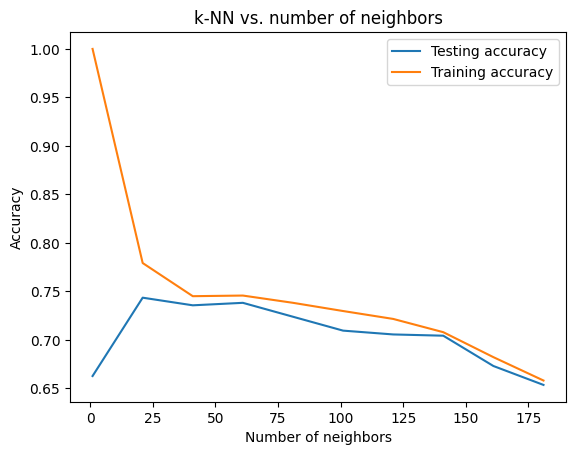

In [66]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, np.mean(val_score, 1), label='Testing accuracy')
plt.plot(neighbors, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

learning_curve()

* Purpose: **Evaluates how the amount of training data affects the model's performance**.   
* X-axis: Represents different sizes of the training dataset (e.g., increasing number of training samples).
* What it shows: Plots the training and validation scores as you train your model on progressively larger subsets of the training data.  
* Goal: Helps you understand if:
Your model would benefit from more training data (if the validation score is still improving).
Your model is suffering from high bias (underfitting) - indicated by low training and validation scores that converge at a low value.
Your model is suffering from high variance (overfitting) - indicated by a significant gap between the high training score and a lower validation score.'

*Use case*: Diagnosing bias-variance issues and determining if gathering more data is likely to improve model performance.

validation_curve()

* Purpose: **Evaluates the impact of a single hyperparameter on the model's performance.** (acts like k-cross validation)
* X-axis: Represents different values of the chosen hyperparameter.
What it shows: Plots the training and validation scores for various settings of that specific hyperparameter.  
* Goal: Helps you identify the optimal range of values for that hyperparameter to avoid underfitting (low scores for both training and validation) or overfitting (high training score but low validation score). You're looking for the hyperparameter value that maximizes the validation score.  

*Use case*: Tuning hyperparameters of your model (e.g., n_neighbors in KNN, C in SVM, max_depth in decision trees).